In [117]:
import numpy
import pandas

date_range = pandas.date_range(start='2018 16 Jan', periods=20, freq='W')
date_range

date_range1 = pandas.date_range(start='2018-01-16', periods=21, freq='H')
date_range1

timestamp_1=pandas.Timestamp('2020 Jan 20 20:33:49')
timestamp_1
# print(timestamp_1.day)
# print(timestamp_1.week)
# print(timestamp_1.minute)
# print(timestamp_1.hour)
# print(timestamp_1.dayofweek)
# print(timestamp_1.is_leap_year)
# print(timestamp_1.month)

# timestamp_1=timestamp_1+pandas.Timedelta('1 hour')
# print(timestamp_1)
# timestamp_1=timestamp_1+pandas.Timedelta('1 day')
# print(timestamp_1)
# timestamp_1=timestamp_1+pandas.Timedelta('1 minute')
# print(timestamp_1)
# timestamp_1=timestamp_1+pandas.Timedelta('1 day 20 minute')
# print(timestamp_1)

period1=pandas.Period('Jan 2016')

# print(period1.start_time,period1.end_time)

timestamp_2=pandas.Timestamp('2016 Jan 23')
# print(period1.start_time<timestamp_2 and period1.end_time>timestamp_2)

#bucket of period

period2=pandas.period_range('2023 Jan 23','2023 March 25',freq='D' )
# period2.start_time

timestamp_3=pandas.Timestamp('2034 April 23 23:34:45')

# print(timestamp_3)
# timestamp_4=timestamp_3.tz_localize('America/Manaus') #localize()for setting, convert() for changing
# print(timestamp_4)
timestamp_4.tz_convert('Asia/Kolkata')

#to check all available timezones
from pytz import all_timezones
# print(all_timezones[:])

first_series=pandas.DataFrame({'Date':pandas.date_range('12/15/2018',periods=20,freq ='H'),'Count':list(range(20))})

first_series = first_series.set_index('Date')
# print(first_series)

# second_series = first_series.asfreq('40Min', method = 'ffill')
# # print(second_series)
# third_series = second_series.asfreq('40Min', method = 'bfill')
# # print(third_series)
# forth_series = third_series.asfreq('40Min', method = None)
# # print(forth_series)
# forth_series.shape
# fifth_series=forth_series.asfreq('5H', method=None)
# fifth_series
ff1=first_series.resample('5H')
ff1
ff2=first_series.resample('5H').sum()
ff2

# first_series.resample('5H').min()
# first_series.resample('5H').max()


,Count
Date,
2018-12-15 00:00:00,10
2018-12-15 05:00:00,35
2018-12-15 10:00:00,60
2018-12-15 15:00:00,85


C:\Users\vivek.kishore\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vivek.kishore\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vivek.kishore\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Residual Sum Of Square: 1.549827


Text(0.5, 1.0, 'ARIMA Model')

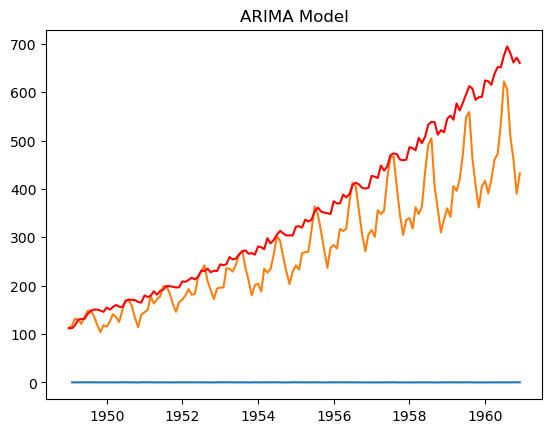

In [89]:
import numpy
import pandas
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
air_passengers=pandas.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col=0)

# air_passengers.head()
# air_passengers.plot()
                                              
def test_timeseries_stationary(ts):
    ts=ts['Passengers']
    print('Dickey-fuller Test:')
    dickey_fuller_test=adfuller(ts,autolag='AIC')
    
    dickey_fuller_output=pandas.Series(dickey_fuller_test[0:4],index=['Test Statistics','p-value','Numbers of Lags used','Observations used'])
    for key,value in dickey_fuller_test[4].items():
        dickey_fuller_output['Critical Value(%s)'%key] = value
    print(dickey_fuller_output)
                                              
# test_timeseries_stationary(air_passengers)

# do transformation

air_passengers_log=numpy.log(air_passengers)

# air_passesngers_log.plot()
air_passengers_log_diff=air_passengers_log-air_passengers_log.shift()
air_passengers_log_diff.dropna(inplace=True)
# test_timeseries_stationary(air_passengers_log_diff)

#another transformation
# rolling_window_12=data.rolling(window=12)
exponential_weighted_average =pandas.DataFrame.ewm(air_passengers_log,halflife=12).mean()
# plt.plot(air_passengers_log)

# plt.plot(exponential_weighted_average, color='Red')

exponential_weighted_average_diff= air_passengers_log-exponential_weighted_average
# test_timeseries_stationary(exponential_weighted_average_diff)

from statsmodels.tsa.arima.model import ARIMA

#AR model
# ARIMA_model_1=ARIMA(air_passengers_log_diff,order=(2,1,0))
# ARIMA_model_1_result=ARIMA_model_1.fit()

# plt.plot(air_passengers_log_diff)
# plt.plot(ARIMA_model_1_result.fittedvalues,color='Green')
# plt.title('AR Model')
# print('Residual Sum Of Square: %.6f'% sum((ARIMA_model_1_result.
# fittedvalues-air_passengers_log_diff['Passengers'])**2))

#MA model
# ARIMA_model_2=ARIMA(air_passengers_log_diff,order=(0,1,1))
# ARIMA_model_2_result=ARIMA_model_2.fit()

# plt.plot(air_passengers_log_diff)
# plt.plot(ARIMA_model_2_result.fittedvalues,color='Green')
# plt.title('AR Model2')
# print('Residual Sum Of Square: %.6f'% sum((ARIMA_model_2_result.
# fittedvalues-air_passengers_log_diff['Passengers'])**2))

#AR+MA model

ARIMA_model_3=ARIMA(air_passengers_log_diff,order=(2,1,1))
ARIMA_model_3_result=ARIMA_model_3.fit()

plt.plot(air_passengers_log_diff)
# plt.plot(ARIMA_model_3_result.fittedvalues,color='Green')
plt.title('AR Model3')
print('Residual Sum Of Square: %.6f'% sum((ARIMA_model_3_result.
fittedvalues-air_passengers_log_diff['Passengers'])**2))

ARIMA_diff_values = pandas.Series(ARIMA_model_3_result.fittedvalues, copy=True)
#convert differencing to log scale
ARIMA_diff_values_cumsum = ARIMA_diff_values.cumsum()
#Now, we have to add these values to our first base number


ARIMA_log =pandas.Series(float(air_passengers_log.iloc[0]),index=air_passengers_log.index)
ARIMA_log =ARIMA_log.add(ARIMA_diff_values_cumsum,fill_value=0)

#now take exponent and plot result
ARIMA_Result = numpy.exp(ARIMA_log)

plt.plot(air_passengers)
plt.plot(ARIMA_Result, color='Red')
plt.title('ARIMA Model')
